In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold , cross_val_score


In [2]:
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
df.shape

(2290, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df = df.drop(['Date'] , axis=1)
df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.isna().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
df.duplicated().sum()

0

<Axes: >

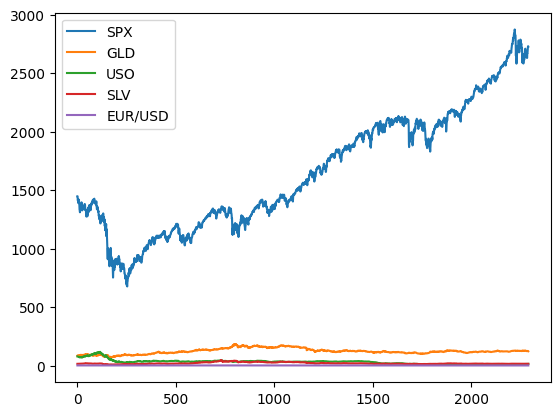

In [16]:
df.plot()

<Axes: ylabel='Frequency'>

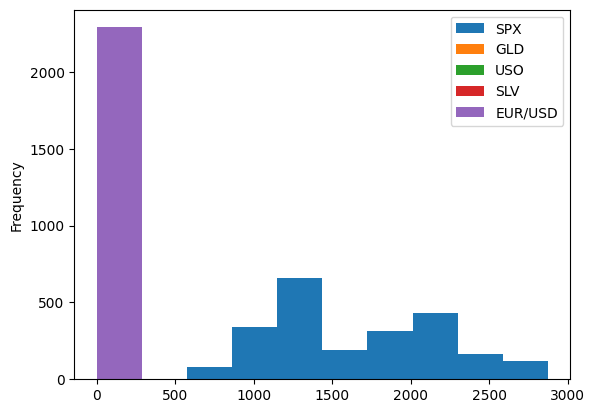

In [17]:
df.plot(kind='hist')

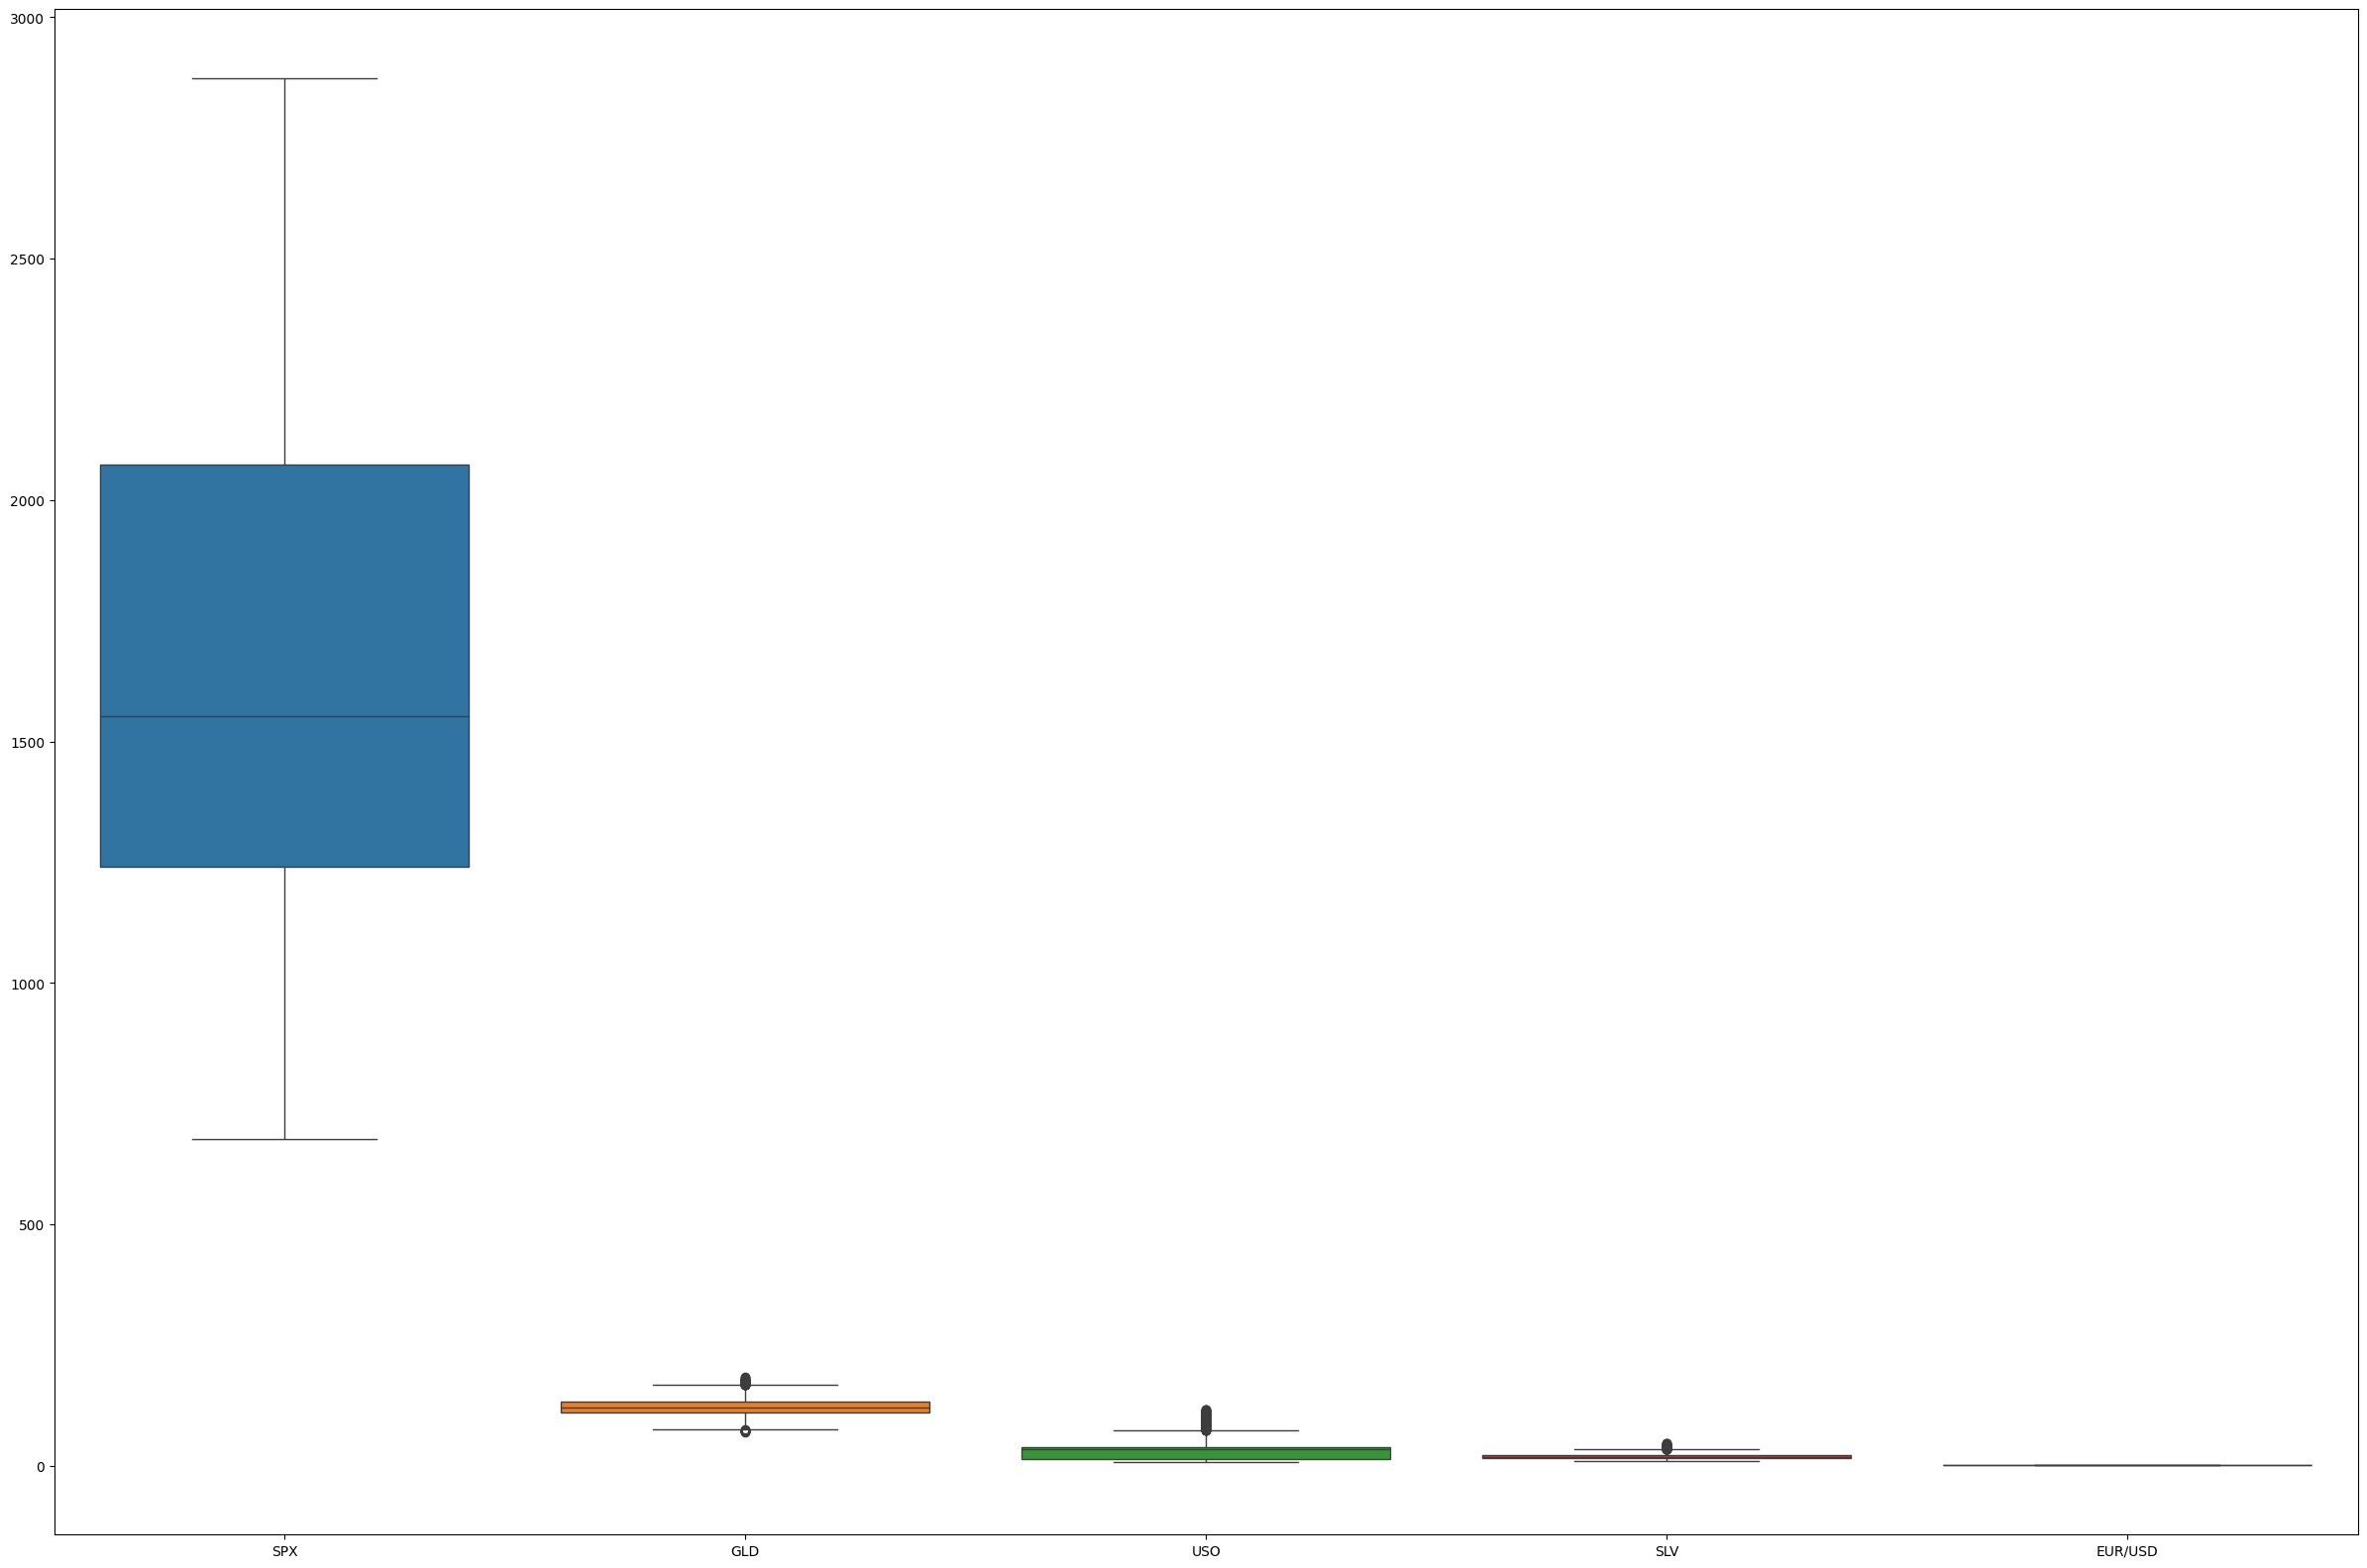

In [7]:
plt.figure(figsize=(30,20))
sns.boxplot(data=df)
plt.show()

In [8]:
x = df.iloc[:,:4]
y = df.iloc[:,4:]


In [9]:
scale = StandardScaler()
x = scale.fit_transform(x)

In [10]:
models = {'Linear':LinearRegression(),'DecisionTree':DecisionTreeRegressor(),
          'RandomForest':RandomForestRegressor(),'SVM':SVR(),
          'KNN':KNeighborsRegressor(),'XGBoost':XGBRegressor()
         }

In [11]:
results = []
for model in models.values():
    kf = KFold(n_splits=5, shuffle=True, random_state=42) 
    cv_result = cross_val_score(model,x,y,cv=kf)
    results.append(cv_result)

c:\Users\omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionW

In [12]:
results

[array([0.75170218, 0.75307317, 0.75745849, 0.78660987, 0.73763157]),
 array([0.9674823 , 0.95535043, 0.95143475, 0.97392726, 0.94612499]),
 array([0.98135667, 0.97944581, 0.98119533, 0.98653193, 0.97972187]),
 array([0.85198586, 0.85701603, 0.85550716, 0.86409015, 0.8390564 ]),
 array([0.98121905, 0.98411837, 0.98177352, 0.98728628, 0.98320011]),
 array([0.97671193, 0.97669858, 0.97098541, 0.98132902, 0.97556502])]

In [13]:
for model, result in zip(models.keys(), results):
    print(f'{model}: {round(result.mean()*100,2)}%')

Linear: 75.73%
DecisionTree: 95.89%
RandomForest: 98.17%
SVM: 85.35%
KNN: 98.35%
XGBoost: 97.63%


C:\Users\omar\AppData\Local\Temp\ipykernel_14008\1494860860.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results,labels=models.keys())


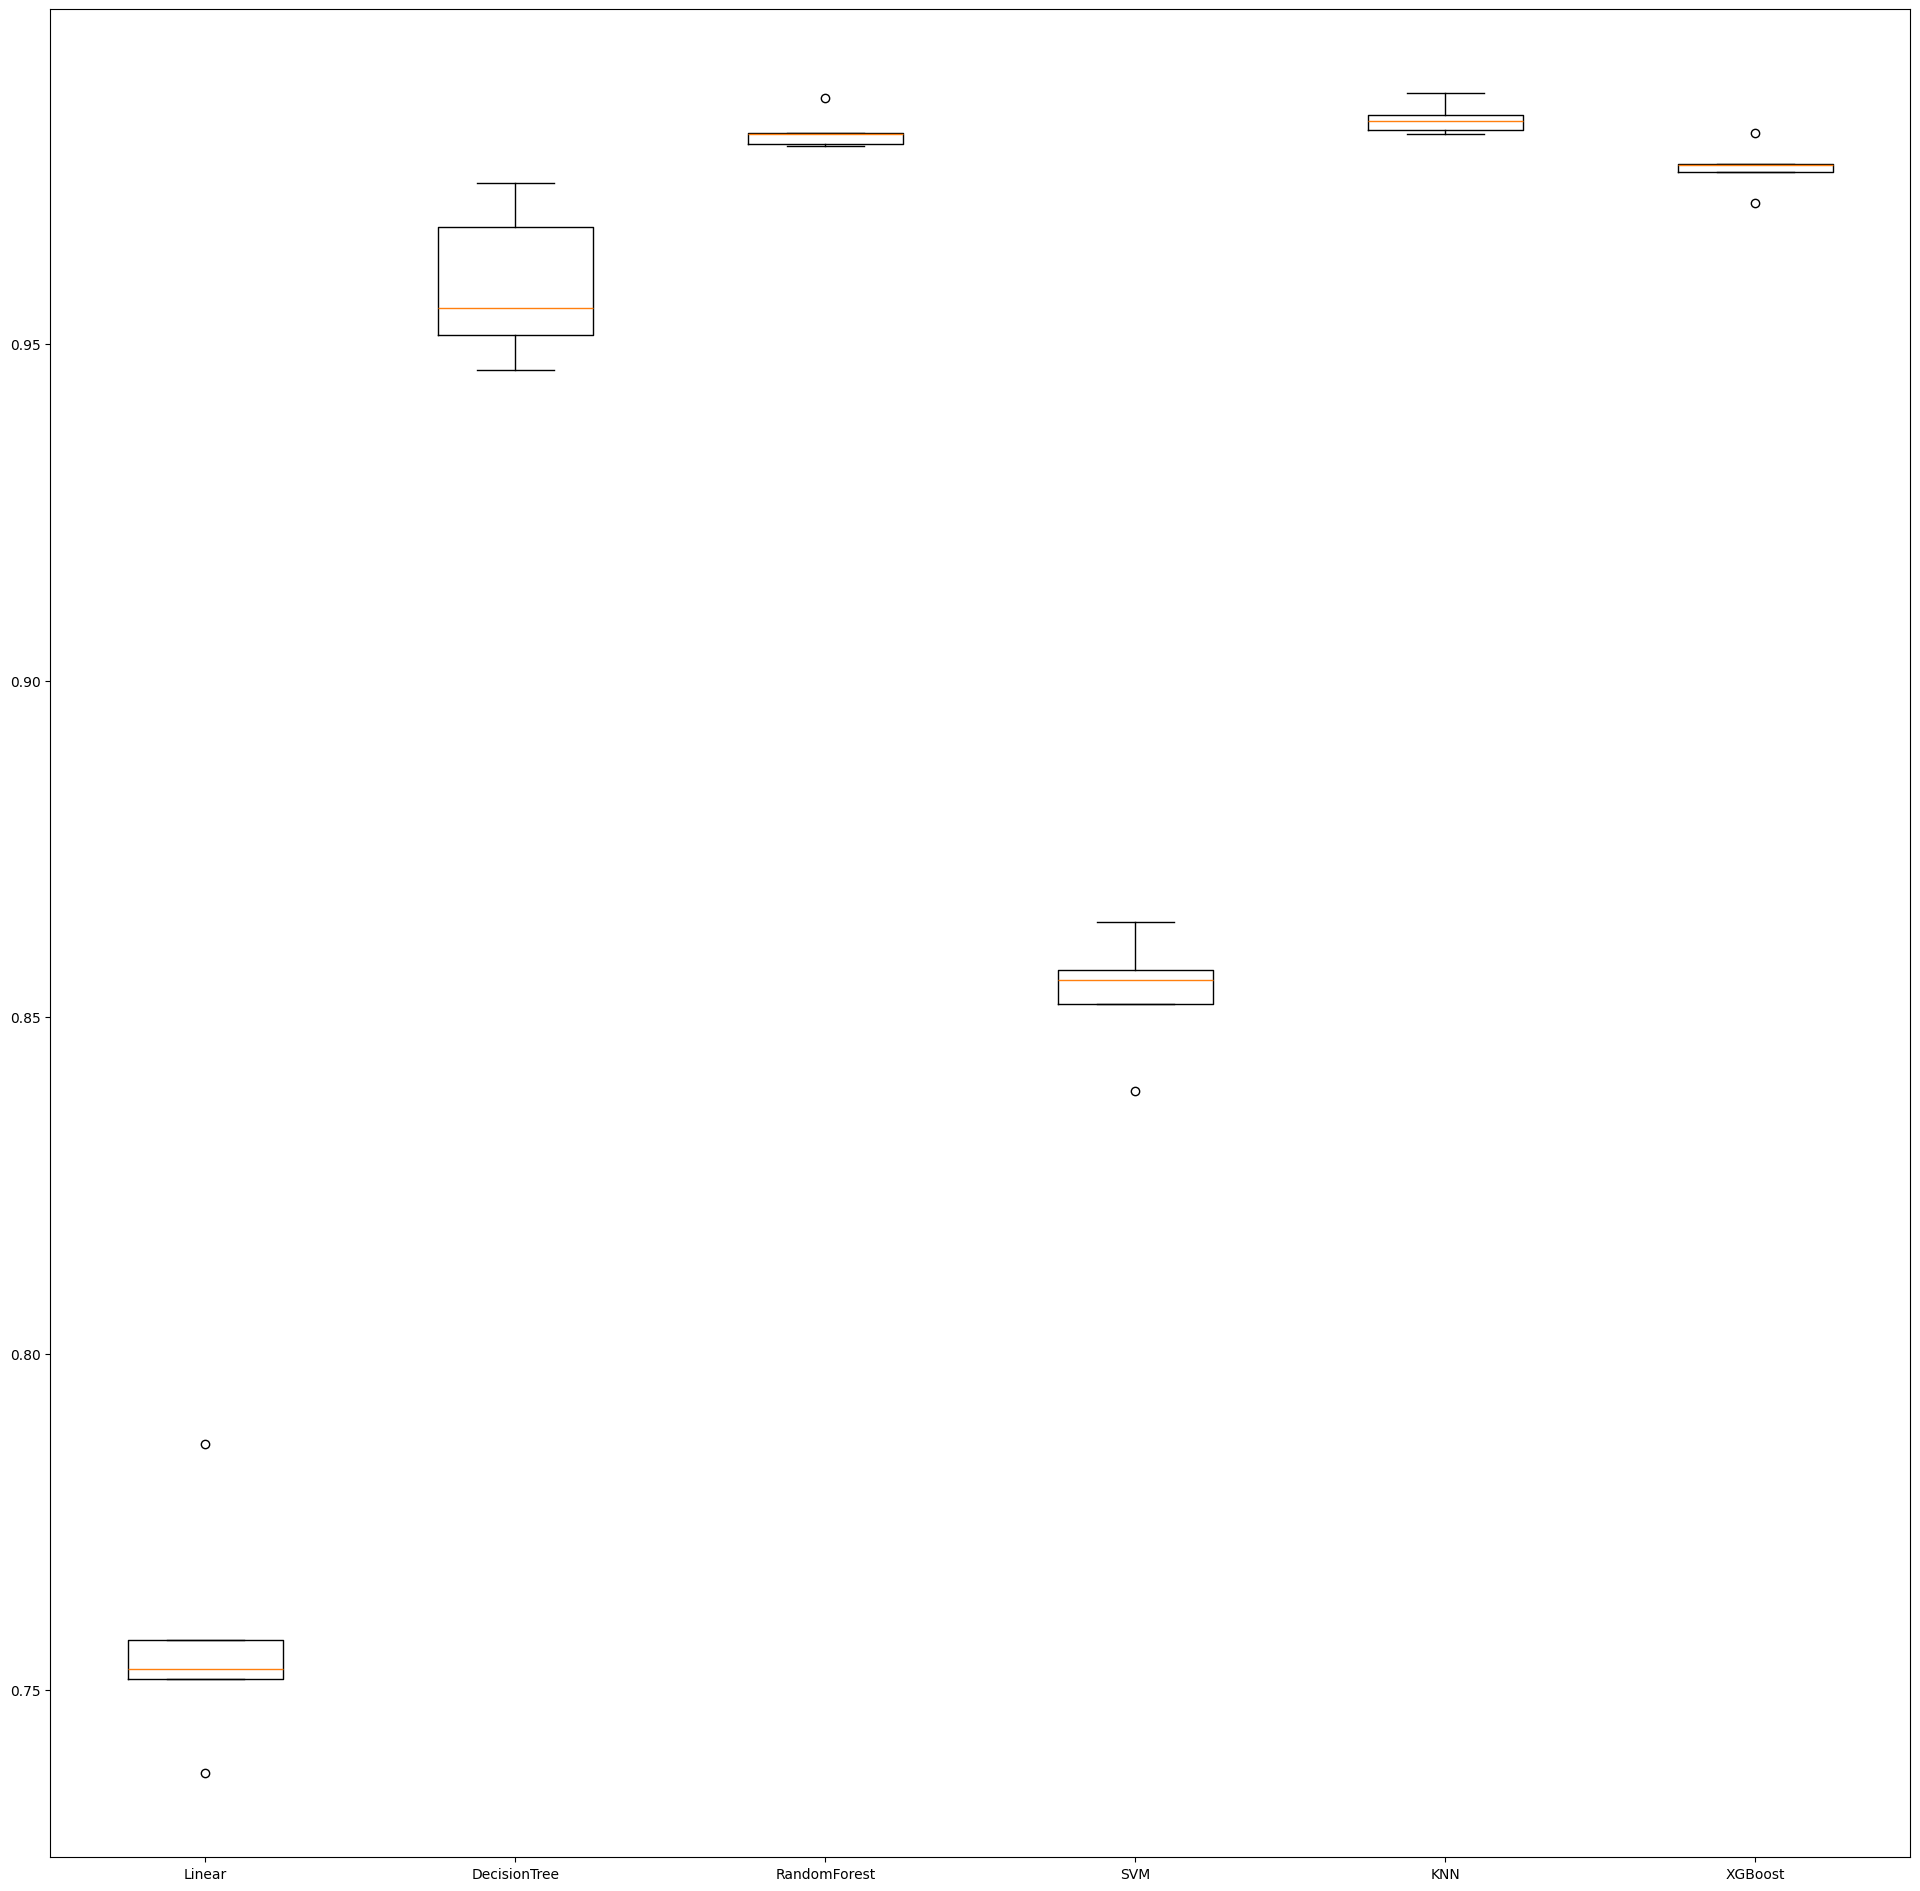

In [14]:
plt.figure(figsize=(24,24))
plt.boxplot(results,labels=models.keys())
plt.show()